In [1]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection, LineCollection
from matplotlib.patches import Polygon
from shapely.geometry import Point, LineString, MultiPolygon, MultiLineString, shape

In [9]:
%run simulator.py

In [10]:
car_artists = {}
def draw_road(ax, road, x, y, cell_size, is_ani):
    if not is_ani:
        ax.plot([x*cell_size, (x+road.length)*cell_size], [-y*cell_size, -y*cell_size], "black",
               linewidth=1)
        ax.plot([x*cell_size, (x+road.length)*cell_size],
                [(-y-road.nlane)*cell_size, (-y-road.nlane)*cell_size], "black", linewidth=1)

        for i in range(1, road.nlane):
            ax.plot([x*cell_size, (x+road.length)*cell_size], [(-y-i)*cell_size, (-y-i)*cell_size], 
                    "b--", linewidth=1, alpha=0.6)
        
    xs = []
    ys = []
    for i, lane in enumerate(road.lanes):
        for vehicle in lane.queue:
            xs.append((x + vehicle.position + 0.5) * cell_size)
            ys.append((-y - i - 0.5)*cell_size)
    
    if not is_ani:
        artist = ax.plot(xs, ys, "r>", markersize=3)
        car_artists[id(road)] = artist[0]
    else:
        car_artists[id(road)].set_data(xs, ys)
    

def draw_simulation_world(ax, world, *, cell_size=10, is_ani=False):
    road1, road2, road3 = world.roads[:3]
    ramp1, ramp2 = world.roads[3:]
    width = (road1.length + road2.length + road3.length) * cell_size
    
    if not is_ani:
        ax.clear()
        ax.set_xlim(-20, width+20)
        ax.set_ylim(-100, 100)
        ax.set_aspect(1)
    
    draw_road(ax, road1, 0, 0, cell_size, is_ani)
    draw_road(ax, road2, road1.length, 0, cell_size, is_ani)
    draw_road(ax, road3, road1.length+road2.length, 0, cell_size, is_ani)
    draw_road(ax, ramp1, road1.length-ramp1.length, 3, cell_size, is_ani)
    draw_road(ax, ramp2, road1.length+road2.length, 3, cell_size, is_ani)

In [11]:
world = World()
road1 = world.add_road(50, 3)
road2 = world.add_road(30, 4)
road3 = world.add_road(50, 3)
ramp1 = world.add_road(40, 1)
ramp2 = world.add_road(40, 1)

source1 = world.add_source(1.0)
source2 = world.add_source(4.0)

road1.connect(road2, 0)
road2.connect(road3, 0)
ramp1.connect(road2, 3)
road2.connect(ramp2, -3)

source1.connect(road1)
source2.connect(ramp1)

In [12]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

draw_simulation_world(ax, world, is_ani=False)
def update(frame):
    draw_simulation_world(ax, world, is_ani=True)
    world.step()
    return list(car_artists.values())
    
ani = FuncAnimation(fig, update, frames=200, blit=True)
ani.save("simulation.mp4", fps=5)

Vehicle (140607366240920) 1 -> 22
Vehicle (140607366241096) 4 -> 22
Vehicle (140607371765368) 0 -> 23
Vehicle (140607366241008) 2 -> 25
Vehicle (140607366241184) 13 -> 36
Vehicle (140607366241272) 15 -> 38
Vehicle (140607371765368) 24 -> 42
Vehicle (140607366241008) 27 -> 47
Vehicle (140607366239864) 27 -> 47
Vehicle (140607366241096) 31 -> 53
Vehicle (140607366241360) 38 -> 56
Vehicle (140607366241184) 37 -> 57
Vehicle (140607366241448) 36 -> 61
Vehicle (140607366240920) 42 -> 68
Vehicle (140607371765368) 48 -> 69
Vehicle (140607366241272) 49 -> 75
Vehicle (140607366241184) 63 -> 83
Vehicle (140607366241448) 62 -> 85
Vehicle (140607366241096) 59 -> 86
Vehicle (140607366241360) 61 -> 88
Vehicle (140607371765368) 73 -> 92
Vehicle (140607366241272) 76 -> 95
Vehicle (140607366241536) 77 -> 103
Vehicle (140607366241096) 87 -> 107
Vehicle (140607366241448) 86 -> 108
Vehicle (140607366241360) 90 -> 110
Vehicle (140607366240920) 97 -> 118
Vehicle (140607366241184) 103 -> 122
Vehicle (14060737

In [13]:
!ffmpeg -i simulation.mp4 -f image2pipe -vcodec ppm - | convert -delay 5 -loop 0 - gif:- | convert -layers Optimize - output.gif    

ffmpeg version 4.0 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 8.1.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvenc --enable-omx --enable-shared --enable-version3
  libavutil      56. 14.100 / 56. 14.100
  libavcodec     58. 18.100 / 58. 18.100
  libavformat    58. 12.100 / 58. 12.100
  libavdevice    

In [7]:
for i in range(40):
    world.step()
    #for lane in road2.lanes:
    #    print(lane.queue)
    #print("----")

[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle (140607371765896)]
[Vehicle (140607371766248)]
----
[Vehicle (140607371765720)]
[Vehicle (140607371765808)]
[Vehicle

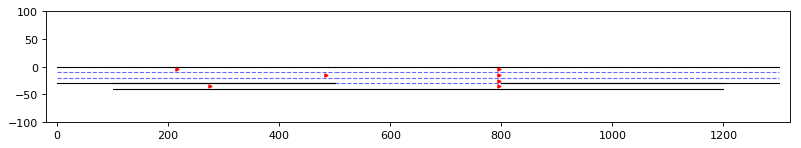

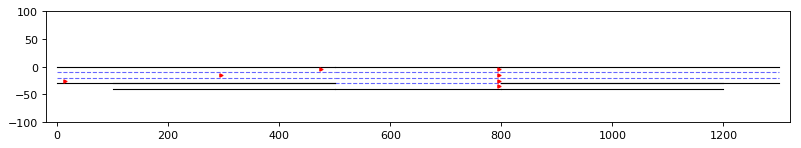

In [8]:
fig = plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
draw_simulation_world(ax, world)
plt.show()

In [89]:
world.roads[1].lanes[0].queue[0].information

{'destination': 1,
 'enter_time': 24,
 'front_gap': 14,
 'left_front_gap': None,
 'left_back_gap': None,
 'right_front_gap': 27,
 'right_back_gap': 37}

In [27]:
%pdb

Automatic pdb calling has been turned OFF
